In [1]:
import pandas as pd
import src.preprocessing as prep
df = pd.read_csv('../data/raw/training_data.csv')

C:\Users\98sul\AppData\Local\Temp\ipykernel_4588\1497002485.py:3: DtypeWarning: Columns (31) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/raw/training_data.csv')


In [27]:
df.head()

,adId,price,Kategorie,Erstzulassung,colour,Kilometerstand,Leistung,Kraftstoffart,make,model,...,Schadstoffklasse,Hubraum,Zugr.-lgd. Treibstoffart,Anzahl Sitzplätze,Fahrzeugnummer,Anzahl der Türen,HU,Umweltplakette,Fahrzeugzustand,Einparkhilfe
0,144230675,65000.0,Cabrio / Roadster,5/2008,Silber Metallic,47.959,525,Benzin,Mercedes-Benz,SL 63 AMG,...,Euro4,6.208 cm³,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
1,145596056,14998.0,Van / Minibus,3/2008,Schwarz Metallic,211.300,224,Diesel,Mercedes-Benz,R 320,...,Euro4,2.987 cm³,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN
2,146126562,15900.0,Sportwagen / Coupé,6/2002,Gold Metallic,84.876,306,Benzin,Mercedes-Benz,CL 500,...,Euro4,4.966 cm³,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN
3,149311358,24950.0,Limousine,1/2003,Silber Metallic,148.000,500,"Benzin, E10-geeignet",Mercedes-Benz,S 55,...,Euro4,5.439 cm³,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN
4,171895600,29990.0,"Kombi, Vorführfahrzeug",11/2012,Grau Metallic,89.000,204,Hybrid (Diesel / Elektro),Mercedes-Benz,E 300,...,Euro5,2.143 cm³,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

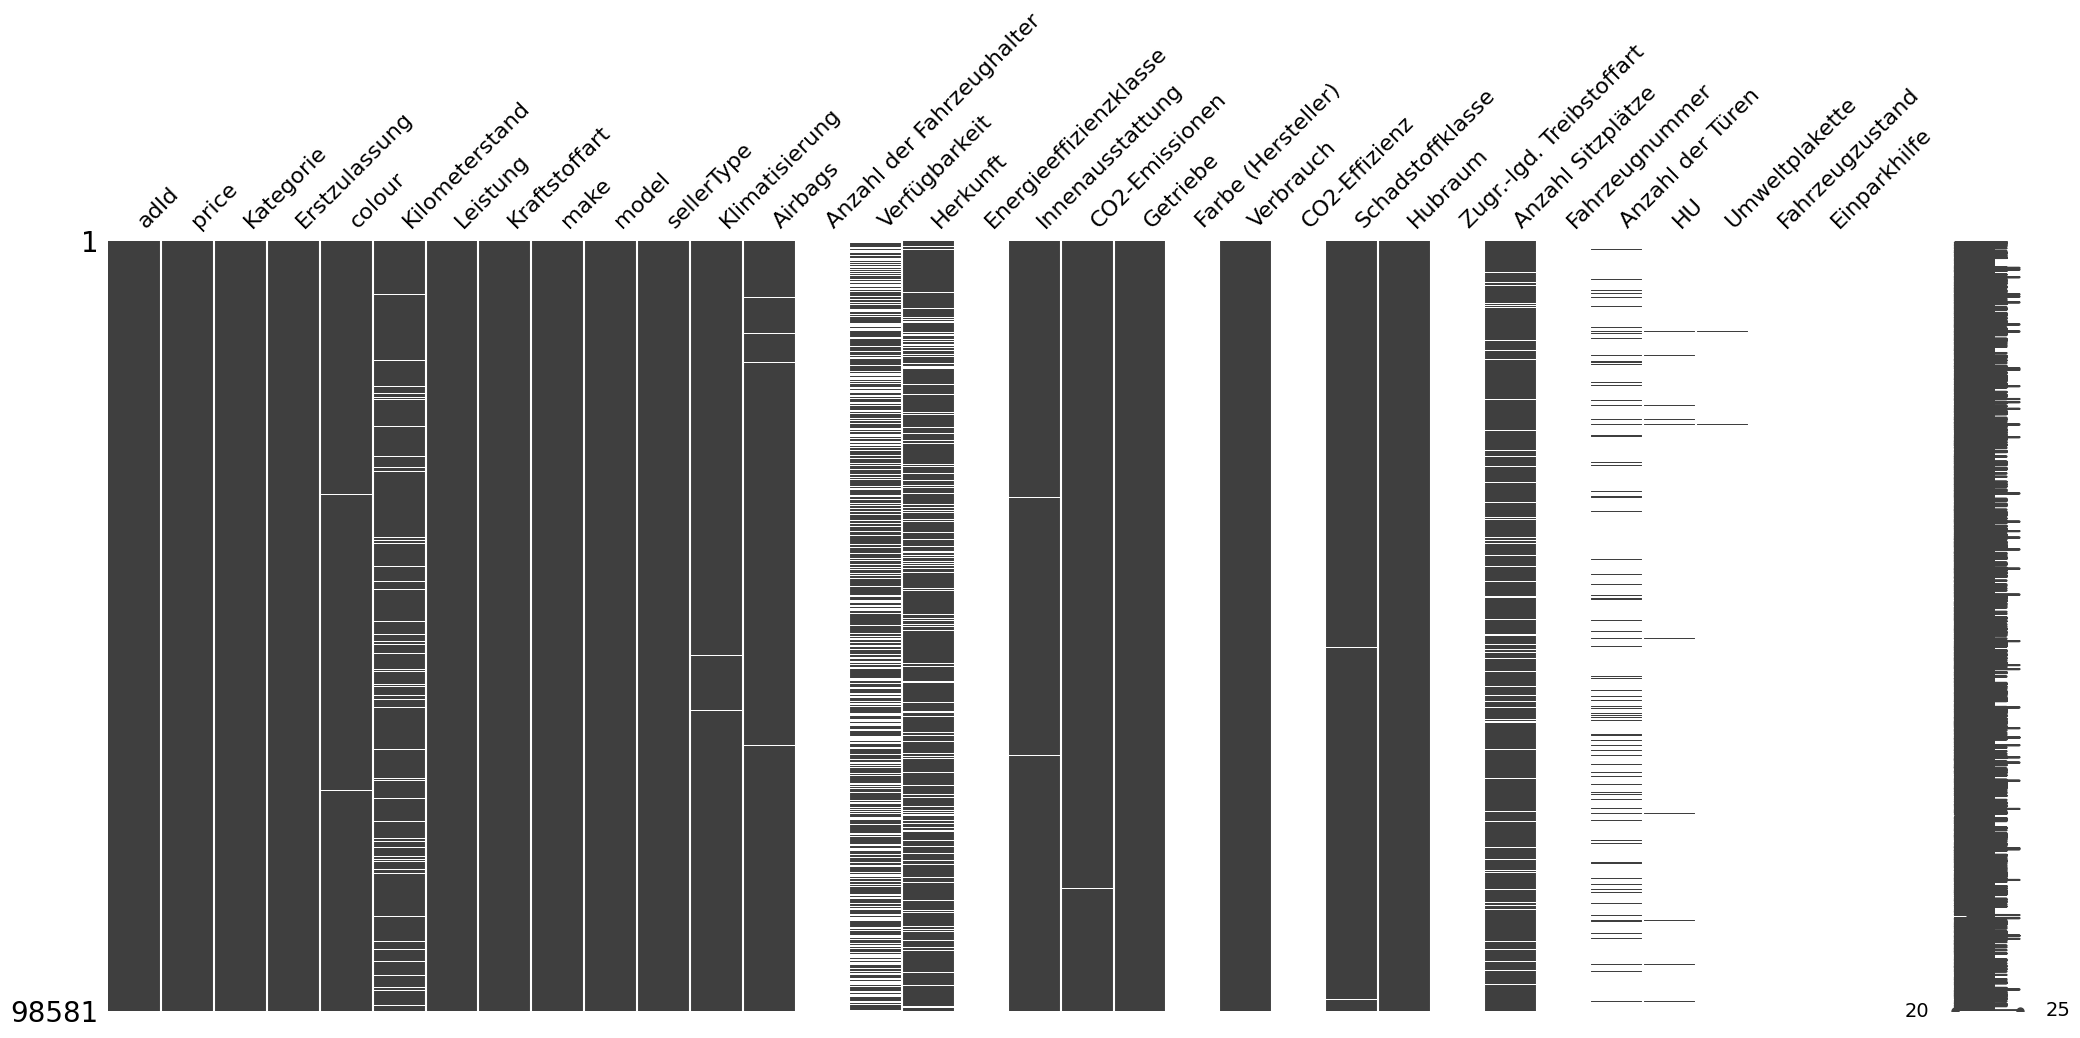

In [28]:
import missingno as msno
msno.matrix(df)

In [2]:
# Drop columns with only null values or a single constant value
# These columns either contain only nulls or provide no variance (e.g., only one unique value)
cols_to_drop = ["Einparkhilfe", "Fahrzeugzustand", "Umweltplakette", "HU", "Fahrzeugnummer",
                "Zugr.-lgd. Treibstoffart", "CO2-Effizienz", "Farbe (Hersteller)",
                "Energieeffizienzklasse", "Anzahl der Fahrzeughalter", "sellerType"]  # only contains 'DEALER'
df.drop(cols_to_drop, axis=1, inplace=True)

In [3]:
spalten_list = df.columns.tolist()
print(spalten_list)

['adId', 'price', 'Kategorie', 'Erstzulassung', 'colour', 'Kilometerstand', 'Leistung', 'Kraftstoffart', 'make', 'model', 'Klimatisierung', 'Airbags', 'Verfügbarkeit', 'Herkunft', 'Innenausstattung', 'CO2-Emissionen', 'Getriebe', 'Verbrauch', 'Schadstoffklasse', 'Hubraum', 'Anzahl Sitzplätze', 'Anzahl der Türen']


In [4]:
df = prep.remove_month_from_registration_date(df)
df = prep.fill_kilometer_with_group_mean(df)
df = prep.fill_gear_by_group(df)


KeyError: 'Modell'

In [14]:
# Count and print the number of missing (NaN) values in the 'Kilometerstand' column
print(df["Getriebe"].isna().sum())

13


In [13]:
print(df["Getriebe"].unique())

['Automatik' 'Schaltgetriebe' nan 'Halbautomatik']


In [35]:
# Klimatisierung,  Airbags, Verfügbarkeit, Herkunft, Innenausstattung, colour

➤ Untersuche 'Herkunft' im Bezug auf 'make'


TypeError: agg function failed [how->mean,dtype->object]